### Подключение модулей

In [876]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Загрузка данных

In [615]:
# загружаем данные из файла в формате CSV и сохраняем переменную df
df_train = pd.read_csv('train.csv', dtype="unicode")
df_test = pd.read_csv('test.csv', dtype='unicode')
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,_,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377861869582354,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,Good,809.98,24.797346908844986,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Описание данных


Признаки:

- ID – Уникальный идентификатор для каждой записи.
- Customer_ID – Уникальный идентификатор для каждого клиента.
- Month – Месяц транзакции или записи.
- Name – Имя клиента.
- Age – Возраст клиента.
- SSN – Номер социального страхования клиента.
- Occupation – Профессия клиента.
- Annual_Income – Годовой доход клиента.
- Monthly_Inhand_Salary – Месячная заработная плата клиента.
- Num_Bank_Accounts – Общее количество банковских счетов, принадлежащих клиенту.
- Num_Credit_Card – Общее количество кредитных карт, которыми владеет клиент.
- Interest_Rate – Процентная ставка, применяемая к займам или кредитам.
- Num_of_Loan – Количество кредитов, взятых клиентом.
- Type_of_Loan – Категории кредитов, полученных клиентом.
- Delay_from_due_date – Задержка платежей по сравнению с установленной датой.
- Num_of_Delayed_Payment – Общее количество случаев просрочки платежей, совершенных клиентом.
- Changed_Credit_Limit – Корректировки, внесенные в кредитный лимит клиента.
- Num_Credit_Inquiries – Количество запросов, сделанных в отношении кредита клиента.
- Credit_Mix – Разновидности кредитов, которыми пользуется клиент (например, кредиты, кредитные карты).
- Outstanding_Debt – Общая сумма задолженности клиента на данный момент.
- Credit_Utilization_Ratio – Доля использованного кредита по сравнению с общим кредитным лимитом.
- Credit_History_Age – Продолжительность кредитной истории клиента.
- Payment_of_Min_Amount – Указывает, платит ли клиент ежемесячно минимально необходимую сумму.
- Total_EMI_per_month – Общий эквивалентный ежемесячный платеж (EMI), выплаченный клиентом.
- Amount_invested_monthly – Ежемесячная сумма инвестиций клиента.
- Payment_Behaviour – Платежные привычки и склонности клиента.
- Monthly_Balance –  Остаток на счете клиента в конце каждого месяца.

Целевой (искомый) признак:
- Credit_Score –  Кредитная оценка клиента (целевая переменная: «Хорошая», «Плохая», «Стандартная»).орошая», «Плохая», «Стандартная»).рошая», «Плохая», «Стандартная»).

### Разведочный анализ данных (РАД, EDA)

In [616]:
# Размерность данных
df_train.shape

(100000, 28)

In [617]:
# выводим типы данных
df_train.dtypes

ID                          object
Customer_ID                 object
Month                       object
Name                        object
Age                         object
SSN                         object
Occupation                  object
Annual_Income               object
Monthly_Inhand_Salary       object
Num_Bank_Accounts           object
Num_Credit_Card             object
Interest_Rate               object
Num_of_Loan                 object
Type_of_Loan                object
Delay_from_due_date         object
Num_of_Delayed_Payment      object
Changed_Credit_Limit        object
Num_Credit_Inquiries        object
Credit_Mix                  object
Outstanding_Debt            object
Credit_Utilization_Ratio    object
Credit_History_Age          object
Payment_of_Min_Amount       object
Total_EMI_per_month         object
Amount_invested_monthly     object
Payment_Behaviour           object
Monthly_Balance             object
Credit_Score                object
dtype: object

Целевая переменная - __Credit_Score__. В тестовой части этого признака нет. Поэтому в работе будем использовать датасет для тренировки.

In [618]:
# Общая информация о датасете
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        100000 non-null  object
 1   Customer_ID               100000 non-null  object
 2   Month                     100000 non-null  object
 3   Name                      90015 non-null   object
 4   Age                       100000 non-null  object
 5   SSN                       100000 non-null  object
 6   Occupation                100000 non-null  object
 7   Annual_Income             100000 non-null  object
 8   Monthly_Inhand_Salary     84998 non-null   object
 9   Num_Bank_Accounts         100000 non-null  object
 10  Num_Credit_Card           100000 non-null  object
 11  Interest_Rate             100000 non-null  object
 12  Num_of_Loan               100000 non-null  object
 13  Type_of_Loan              88592 non-null   object
 14  Delay

Признаки __Name__, __Monthly__, __Inhand_Salary__, __Type_of_Loan__, __Num_of_Delayed_Payment__, __Num_Credit_Inquiries__, __Credit_History_Age__, __Amount_invested_monthly__, __Monthly_Balance__ имеют пустые значения

Все признаки представлены в типе данных `object`. Необходимо привести соответсвующие парматеры к соотвутсвующему типу данных.

__Столбцы обозначающие ID можно удалить.__

In [619]:
df_train.duplicated().sum()

0

In [620]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [621]:
# исследование целевого (target) признака - Кредитная оценка клиента 
df_train['Credit_Score'].nunique()

3

In [622]:
df_train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [623]:
df_train.Age.describe()

count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object

In [624]:
df_train.Month.describe()

count      100000
unique          8
top       January
freq        12500
Name: Month, dtype: object

In [625]:
df_train.Type_of_Loan.unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [626]:
df_train.describe().T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Monthly_Inhand_Salary,84998,13235,6769.13,15
Num_Bank_Accounts,100000,943,6,13001


Аномальные значения в __Monthly_Balance__, __Age__. Большинство строк признаков __Occupation__, __Amount_invested_monthly__ имеют прочерки.

### Предварительная обработка данных

In [627]:
# Удаление столбцов с ID. Удаление пустых строк. Приведение признаков к нормальному виду.

In [628]:
df_train = df_train.drop(['ID', 'Customer_ID'], axis=1)
df_train.head(2)

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,4,3,...,_,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [629]:
# Приведём параметр Month, к типу данных int
dict_month = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8}
df_train['Month_ID'] = df_train['Month'].map(dict_month)

In [630]:
df_train.drop('Month', axis=1, inplace=True)

In [631]:
df_train.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [632]:
dict_scores = {'Good' : 1, 'Standard' : 2, 'Poor' : 3}
df_train['Score_ID'] = df_train.Credit_Score.map(dict_scores)

In [633]:
df_train.drop('Credit_Score', axis=1, inplace=True)

In [634]:
# df.Age = df.Age.apply(pd.to_numeric) 
def to_int_fnumber(num):
    if str(num).replace('.', '', 1).isdigit():
        return int(float(num))
    else:
        return np.NaN

def to_int_number(num):
    if num.isdigit():
        return int(float(num))
    else:
        return np.NaN

def to_own(num):
    if num < 0:
        return 0.0
    else:
        return float(num)

def to_norm_age(age):
    if age > 100:
        return 100
    elif age < 18:
        return 18
    return age

In [635]:
df_train.Age = df_train.Age.map(to_int_number)

In [636]:
df_train.Age = df_train.Age.map(to_norm_age)

In [637]:
df_train.Age.fillna(df_train.Age.mean(), inplace=True)

In [638]:
df_train.Age.describe()

count    100000.000000
mean         34.735535
std          13.464354
min          18.000000
25%          25.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: Age, dtype: float64

In [639]:
df_train.Occupation.where(df_train.Occupation == "_______").count()

7062

In [640]:
df_train['Occupation'] = df_train['Occupation'].replace("_______", "No occupation")

In [641]:
df_train.Occupation.value_counts()

Occupation
No occupation    7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [642]:
df_train.isna().sum()

Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Month_ID                        0
Score_ID                        0
dtype: int64

In [643]:
# Аномальностей нет

In [644]:
# изменим значения в столбце Annual_Income, в которых есть '_'
df_train['Annual_Income'] = df_train['Annual_Income'].str.replace('_', '')

In [645]:
# Приведём столбец Annual_Income к численному типу
df_train['Annual_Income'] = df_train['Annual_Income'].astype('float')

In [646]:
# Приведём столбец Monthly_Inhand_Salary к численному типу
df_train['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].astype('float')

In [647]:
# Заполним пустые значения медианными
df_train['Monthly_Inhand_Salary'].fillna(df_train['Monthly_Inhand_Salary'].mean(), inplace=True) 

In [648]:
# Проверим на пустые значения
df_train['Monthly_Inhand_Salary'].isna().sum()

0

In [649]:
# Приведём столюец Num_Bank_Accounts к численному типу
df_train['Num_Bank_Accounts'] = df_train['Num_Bank_Accounts'].astype('float')

In [650]:
# посмотрим статистику по столбцу Num_Bank_Accounts
df_train['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6.0       13001
7.0       12823
8.0       12765
4.0       12186
5.0       12118
          ...  
1626.0        1
1470.0        1
887.0         1
211.0         1
697.0         1
Name: count, Length: 943, dtype: int64

In [651]:
# Заменим данные у которых счётов больше 10 или меньше нуля на медианное значение

In [652]:
def replace_num_bank_accounts(x):
    if x < 0 or x > 10:
        return np.nan
    return x

In [653]:
df_train['Num_Bank_Accounts'] = df_train['Num_Bank_Accounts'].apply(replace_num_bank_accounts)

In [654]:
df_train['Num_Bank_Accounts'].fillna(int(df_train['Num_Bank_Accounts'].mean()), inplace=True)

In [655]:
# Преобразуем столбец Num_Credit_Card к численному типу
df_train['Num_Credit_Card'] = df_train['Num_Credit_Card'].astype('int')

In [656]:
df_train['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [657]:
# изменим значения у которых больше 10
df_train['Num_Credit_Card'] = df_train['Num_Credit_Card'].apply(lambda x: x if x <= 10 else np.nan)

In [658]:
df_train['Num_Credit_Card'].fillna(round(df_train['Num_Credit_Card'].mean(), 1), inplace=True)

In [659]:
# Приведем столбец Interest_Rate к целочисленному типу
df_train['Interest_Rate'] = df_train['Interest_Rate'].astype('int')

In [660]:
# Заменим данные больше 35 на NaN
df_train['Interest_Rate'] = df_train['Interest_Rate'].apply(lambda x: x if x < 35 else np.nan)

In [661]:
# Заполним пустые значения средними
df_train['Interest_Rate'].fillna(round(df_train['Interest_Rate'].mean(), 1), inplace=True)

In [662]:
# Те же действия со столбцом Num_of_Loan
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].str.replace('_', '')
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].astype('int')
df_train['Num_of_Loan'] = df_train['Interest_Rate'].apply(lambda x: x if x < 10 else np.nan)
df_train['Num_of_Loan'].fillna(round(df_train['Num_of_Loan'].mean(), 0), inplace=True)

In [663]:
df_train['Delay_from_due_date'].describe()

count     100000
unique        73
top           15
freq        3596
Name: Delay_from_due_date, dtype: object

In [664]:
df_train['Delay_from_due_date'] = df_train['Delay_from_due_date'].astype('int')

In [665]:
df_train['Num_of_Delayed_Payment'].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [666]:
# Заменим нечисловые данные на 0, а к числовым применим целочисленный тип
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(lambda x: int(x) if str(x).isdigit() else 0)

In [667]:
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x < 0 or x > 30 else x)
df_train['Num_of_Delayed_Payment'].fillna(int(df_train['Num_of_Delayed_Payment'].mean()), inplace=True)
df_train['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         12.022460
std           7.140894
min           0.000000
25%           7.000000
50%          12.000000
75%          18.000000
max          28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [668]:
# Обработка столбца 'Changed_Credit_Limit'
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].str.replace('_', '0').astype('float')
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].apply(lambda x: x if x >= 0 else round(df_train['Changed_Credit_Limit'].mean(), 2))
df_train['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.370612
std           6.690871
min           0.000000
25%           5.330000
50%           9.480000
75%          14.660000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

In [669]:
df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].map(to_int_fnumber)
df_train.Num_Credit_Inquiries.dtype

dtype('float64')

In [670]:
df_train.Num_Credit_Inquiries.describe()

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [671]:
df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].fillna(df_train['Num_Credit_Inquiries'].mean())

In [672]:
# Аномальностей нет

In [673]:
df_train[df_train["Credit_Mix"] == "_"]

,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_ID,Score_ID
0,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3.0,...,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,1,1
10,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,5.5,6.0,6.0,...,605.03,33.22495078663659,26 Years and 9 Months,No,18.816214573128885,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,3,2
19,Langep,34.0,486-85-3974,Engineer,143162.64,12187.220000,1.0,5.0,8.0,8.0,...,1303.01,39.50164810812735,NaN,No,246.9923194537421,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,4,1
29,Jasond,55.0,#F%$D@*&8,No occupation,30689.89,2612.490833,2.0,5.0,4.0,4.0,...,632.46,27.4454217928553,17 Years and 8 Months,No,16.415451659824875,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,6,2
35,Deepaa,21.0,615-06-7821,Developer,35547.71,2853.309167,7.0,5.0,5.0,5.0,...,943.86,28.924953778098622,30 Years and 11 Months,Yes,0.0,96.78548508587444,High_spent_Medium_value_payments,438.5454315807922,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,Sarah McBridec,28.0,#F%$D@*&8,Architect,20002.88,1929.906667,10.0,8.0,29.0,6.0,...,3571.7,28.508250155330483,6 Years and 0 Months,Yes,60.964772373422434,213.97800979403817,Low_spent_Small_value_payments,208.04788449920608,5,2
99992,Nicks,24.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,7.0,...,502.38,32.99133302816466,31 Years and 3 Months,No,35.10402261040746,401.1964806036356,Low_spent_Small_value_payments,189.64108011929028,1,3
99994,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,7.0,...,502.38,39.32356935765127,31 Years and 5 Months,No,35.10402261040746,140.58140274528395,High_spent_Medium_value_payments,410.2561579776419,3,3
99995,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,7.0,...,502.38,34.66357180929323,31 Years and 6 Months,No,35.10402261040746,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,4,3


In [674]:
# Лучше заполнить пропуски значением Good
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace('_', 'Good')
df_train[df_train["Credit_Mix"] == "_"]

,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_ID,Score_ID


In [675]:
# Аномальностей нет

In [676]:
df_train.Outstanding_Debt.max()

'999.48'

In [677]:
# Приведем в числовое значение
df_train["Outstanding_Debt"] = df_train["Outstanding_Debt"].map(to_int_fnumber)

In [678]:
df_train.Outstanding_Debt.describe()

count    98991.000000
mean      1426.005708
std       1155.048530
min          0.000000
25%        566.000000
50%       1166.000000
75%       1948.000000
max       4998.000000
Name: Outstanding_Debt, dtype: float64

In [679]:
# Смотрим кол-во пустых значений
df_train.Outstanding_Debt.isna().sum()

1009

In [680]:
# Соттношение 1% - Заменим пустые значения на 0
df_train.Outstanding_Debt = df_train.Outstanding_Debt.fillna(0)

In [681]:
df_train.Outstanding_Debt.dtype

dtype('float64')

In [682]:
# Аномальностей нет

In [683]:
df_train.Credit_Utilization_Ratio.max()

'50.00000000000001'

In [684]:
# Приведем в числовое значение
df_train["Credit_Utilization_Ratio"] = df_train["Credit_Utilization_Ratio"].map(to_int_fnumber)

In [685]:
df_train.Credit_Utilization_Ratio.describe()

count    100000.000000
mean         31.785410
std           5.125047
min          20.000000
25%          28.000000
50%          32.000000
75%          36.000000
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [686]:
# Аномальностей нет

In [687]:
df_train.Credit_History_Age.describe()

count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object

In [688]:
# Проверим строки с пустой кредитной историей
df_train.loc[df_train['Credit_History_Age'].isna(), ['Outstanding_Debt', "Num_of_Loan",'Credit_History_Age']]

,Outstanding_Debt,Num_of_Loan,Credit_History_Age
1,809.0,3.0,NaN
7,809.0,3.0,NaN
19,1303.0,8.0,NaN
40,548.0,8.0,NaN
42,548.0,8.0,NaN
...,...,...,...
99944,418.0,6.0,NaN
99963,1079.0,6.0,NaN
99968,897.0,5.0,NaN
99975,897.0,5.0,NaN


In [689]:
# Кредитная история должна быть запсиана, при таких значениях. Процентное соотношение примерно 9% - строки к удалению не подлежат.
# Заполним пустые значения на "No writed"
df_train.Credit_History_Age = df_train.Credit_History_Age.replace(np.NaN, "No writed")

In [690]:
df_train['Credit_History_Age'].describe()

count        100000
unique          405
top       No writed
freq           9030
Name: Credit_History_Age, dtype: object

In [691]:
# Аномальностей нет

In [692]:
print("Describe:\n",df_train.Payment_of_Min_Amount.describe())
print("Unique:\n",df_train.Payment_of_Min_Amount.unique())

Describe:
 count     100000
unique         3
top          Yes
freq       52326
Name: Payment_of_Min_Amount, dtype: object
Unique:
 ['No' 'NM' 'Yes']


In [693]:
# Аномальностей нет

In [694]:
df_train.Total_EMI_per_month.describe()

count     100000
unique     14950
top          0.0
freq       10613
Name: Total_EMI_per_month, dtype: object

In [695]:
# Переведем в числовой тип

In [696]:
df_train.Total_EMI_per_month = df_train.Total_EMI_per_month.map(to_int_fnumber)

In [697]:
df_train.Total_EMI_per_month.describe()

count    100000.000000
mean       1402.687080
std        8306.107873
min           0.000000
25%          30.000000
50%          69.000000
75%         161.000000
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [698]:
# Аномальностей нет

In [699]:
df_train.Amount_invested_monthly.describe()

count         95521
unique        91049
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object

In [700]:
df_train[df_train.Amount_invested_monthly.str.contains("_", na=False)]

,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_ID,Score_ID
18,Langep,34.0,486-85-3974,No occupation,143162.64,4194.170850,1.0,5.0,8.0,8.0,...,1303.0,26,17 Years and 11 Months,No,246,__10000__,High_spent_Small_value_payments,715.741367403555,3,1
23,Langep,34.0,486-85-3974,Engineer,143162.64,12187.220000,1.0,5.0,8.0,8.0,...,1303.0,38,18 Years and 4 Months,No,246,__10000__,High_spent_Small_value_payments,895.494583180492,8,2
28,Jasond,55.0,072-31-6145,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,4.0,...,632.0,41,17 Years and 7 Months,No,16,__10000__,Low_spent_Large_value_payments,359.37491550776383,5,2
121,Chalmersa,30.0,965-46-2491,Scientist,31993.78,2942.148333,6.0,6.0,7.0,7.0,...,818.0,37,16 Years and 11 Months,Yes,45,__10000__,Low_spent_Small_value_payments,157.86980351234496,2,2
142,Patrickg,46.0,928-91-4452,Teacher,32284.62,2898.385000,6.0,7.0,17.0,6.0,...,0.0,24,6 Years and 11 Months,Yes,103,__10000__,Low_spent_Small_value_payments,85.90209492602362,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99879,Xolai,27.0,#F%$D@*&8,Scientist,118677.54,9963.795000,4.0,4.0,6.0,6.0,...,995.0,39,30 Years and 6 Months,No,237,__10000__,High_spent_Medium_value_payments,801.7522964700404,8,1
99882,Yantoultra Nguif,31.0,291-51-7240,Mechanic,16884797.00,5440.945000,7.0,3.0,14.5,6.0,...,330.0,38,23 Years and 0 Months,Yes,0,__10000__,High_spent_Small_value_payments,536.3429201945062,3,2
99919,Phil Wahbao,54.0,683-59-7399,Media_Manager,20059.98,1523.665000,8.0,5.0,12.0,6.0,...,909.0,32,16 Years and 10 Months,No,45,__10000__,Low_spent_Small_value_payments,267.1849850078536,8,3
99951,Ryana,33.0,837-85-9800,Media_Manager,59146.36,4908.863333,3.0,6.0,6.0,6.0,...,418.0,27,20 Years and 8 Months,No,26,__10000__,Low_spent_Large_value_payments,389.4884832490341,8,2


In [701]:
# Строк с "_" много, поэтому удалим их
df_train.Amount_invested_monthly = df_train.Amount_invested_monthly.replace("_","", regex=True)
df_train.Amount_invested_monthly.describe()

count     95521
unique    91049
top       10000
freq       4305
Name: Amount_invested_monthly, dtype: object

In [702]:
df_train.Amount_invested_monthly = df_train.Amount_invested_monthly.map(to_int_fnumber)

In [703]:
df_train.Amount_invested_monthly.describe()

count    95521.000000
mean       636.936286
std       2043.422369
min          0.000000
25%         74.000000
50%        135.000000
75%        265.000000
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [704]:
# Заменим пустые значения на 0
df_train.Amount_invested_monthly = df_train.Amount_invested_monthly.fillna(0)
df_train.Amount_invested_monthly.describe()

count    100000.000000
mean        608.407910
std        2001.475997
min           0.000000
25%          67.000000
50%         128.000000
75%         255.000000
max       10000.000000
Name: Amount_invested_monthly, dtype: float64

In [705]:
# Аномальностей нет

In [706]:
print("__Describe__:\n",df_train.Payment_Behaviour.describe())
print("__Unique__:\n",df_train.Payment_Behaviour.unique())

__Describe__:
 count                             100000
unique                                 7
top       Low_spent_Small_value_payments
freq                               25513
Name: Payment_Behaviour, dtype: object
__Unique__:
 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [707]:
count_udefined_stroke = df_train.loc[df_train.Payment_Behaviour == "!@9#%8", ["Payment_Behaviour"]].count()
count_udefined_stroke

Payment_Behaviour    7600
dtype: int64

In [708]:
# Процентное соотношение таких записей приблизительно 7%. Заменим на "Undefined"

In [709]:
df_train.Payment_Behaviour = df_train.Payment_Behaviour.replace("!@9#%8", "Undefined")
df_train.loc[df_train.Payment_Behaviour == "!@9#%8", ["Payment_Behaviour"]].count()

Payment_Behaviour    0
dtype: int64

In [710]:
# Аномальных значений нет

In [711]:
df_train.Monthly_Balance.describe()

count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object

In [712]:
# Проверим кол-во записей с содержанием "_"
df_train[df_train.Monthly_Balance.str.contains("_", na=False)]

,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_ID,Score_ID
5545,Paul Dayl,18.0,186-49-9679,Developer,41086.400,3660.866667,3.0,4.0,6.0,6.0,...,113.0,34,11 Years and 6 Months,Yes,145,201.0,Low_spent_Medium_value_payments,__-333333333333333333333333333__,2,2
26177,Scuffhamq,45.0,264-53-1943,Engineer,29728.310,2551.359167,3.0,4.0,6.0,6.0,...,917.0,38,31 Years and 9 Months,No,34,198.0,Low_spent_Large_value_payments,__-333333333333333333333333333__,2,1
29158,Selamk,55.0,970-19-8342,Lawyer,30748.930,2572.410833,1.0,6.0,12.0,6.0,...,860.0,40,19 Years and 5 Months,No,43,79.0,High_spent_Small_value_payments,__-333333333333333333333333333__,7,2
35570,Anna Driveri,45.0,288-62-7562,No occupation,20929.295,1704.107917,5.0,3.0,9.0,9.0,...,858.0,33,21 Years and 7 Months,No,13798,220.0,Low_spent_Small_value_payments,__-333333333333333333333333333__,3,2
38622,Longstretho,21.0,006-36-0111,Doctor,15167.620,1471.968333,4.0,5.0,3.0,3.0,...,847.0,28,No writed,NM,9,128.0,Low_spent_Small_value_payments,__-333333333333333333333333333__,7,2
60009,radenp,30.0,046-72-5387,Journalist,92114.680,7811.223333,3.0,4.0,8.0,8.0,...,820.0,39,20 Years and 10 Months,Yes,54,0.0,High_spent_Large_value_payments,__-333333333333333333333333333__,2,2
75251,Kristen Haysq,29.0,577-85-0830,Mechanic,60904.590,4194.170850,3.0,4.0,12.0,6.0,...,2441.0,29,12 Years and 11 Months,Yes,61,394.0,Low_spent_Small_value_payments,__-333333333333333333333333333__,4,2
82918,Doeringq,44.0,693-64-7611,Journalist,61990.520,4900.876667,10.0,10.0,25.0,6.0,...,3618.0,37,13 Years and 8 Months,NM,355,194.0,Low_spent_Small_value_payments,__-333333333333333333333333333__,7,2
83255,Sabina Zawadzkif,31.0,109-48-2095,Doctor,126353.040,10635.420000,4.0,7.0,19.0,6.0,...,859.0,28,31 Years and 9 Months,No,167,549.0,Low_spent_Medium_value_payments,__-333333333333333333333333333__,8,3


In [713]:
# Будем считать, что у клиента не остается задолжности в конце месяца:

In [719]:
df_train.Monthly_Balance = df_train.Monthly_Balance.replace("_","", regex=True)
df_train.Monthly_Balance = df_train.Monthly_Balance.fillna(0)
df_train.Monthly_Balance = df_train.Monthly_Balance.map(to_int_fnumber)
df_train.Monthly_Balance = df_train.Monthly_Balance.map(to_own)

In [720]:
df_train.Monthly_Balance.describe()

count    100000.000000
mean        397.189190
std         217.120249
min           0.000000
25%         267.000000
50%         334.000000
75%         467.000000
max        1602.000000
Name: Monthly_Balance, dtype: float64

In [572]:
# Аномальных значений нет

In [716]:
print("__Describe__:\n",df_train.Score_ID.describe())
print("__Unique__:\n",df_train.Score_ID.unique())

__Describe__:
 count    100000.00000
mean          2.11170
std           0.67512
min           1.00000
25%           2.00000
50%           2.00000
75%           3.00000
max           3.00000
Name: Score_ID, dtype: float64
__Unique__:
 [1 2 3]


In [717]:
# Аномальных значений нет

In [721]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Name                      90015 non-null   object 
 1   Age                       100000 non-null  float64
 2   SSN                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int32  
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

### Статистика

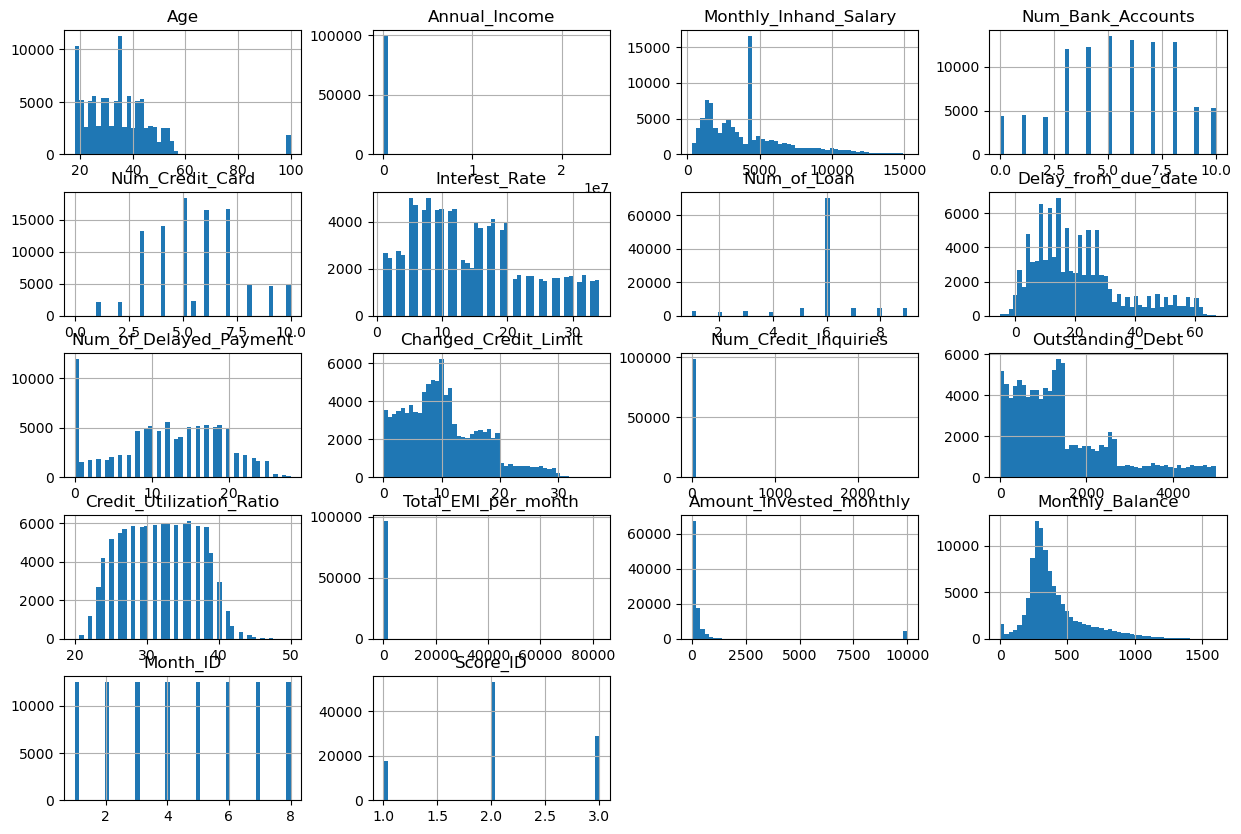

In [575]:
df_train.hist(figsize = (15,10), bins = 50);

In [459]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_ID,Score_ID
count,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99991.000000,100000.000000,100000.00000
mean,34.735535,1.764157e+05,4194.170850,5.36351,5.530585,14.530960,5.862730,21.068780,12.022460,10.370612,27.754251,1411.617310,31.785410,1402.687080,608.407910,397.224940,4.500000,0.88830
std,13.464354,1.429618e+06,2935.176493,2.57487,2.041460,8.650408,1.448588,14.860104,7.140894,6.690871,191.269936,1158.009777,5.125047,8306.107873,2001.475997,217.097316,2.291299,0.67512
min,18.000000,7.005930e+03,303.645417,0.00000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,25.000000,1.945750e+04,1792.084167,3.00000,4.000000,8.000000,6.000000,10.000000,7.000000,5.330000,3.000000,551.000000,28.000000,30.000000,67.000000,267.000000,2.750000,0.00000
50%,34.000000,3.757861e+04,3852.736667,5.00000,5.000000,13.000000,6.000000,18.000000,12.000000,9.480000,6.000000,1154.000000,32.000000,69.000000,128.000000,334.000000,4.500000,1.00000
75%,42.000000,7.279092e+04,5371.525000,7.00000,7.000000,20.000000,6.000000,28.000000,18.000000,14.660000,9.000000,1933.000000,36.000000,161.000000,255.000000,467.000000,6.250000,1.00000
max,100.000000,2.419806e+07,15204.633333,10.00000,10.000000,34.000000,9.000000,67.000000,28.000000,36.970000,2597.000000,4998.000000,50.000000,82331.000000,10000.000000,1602.000000,8.000000,2.00000


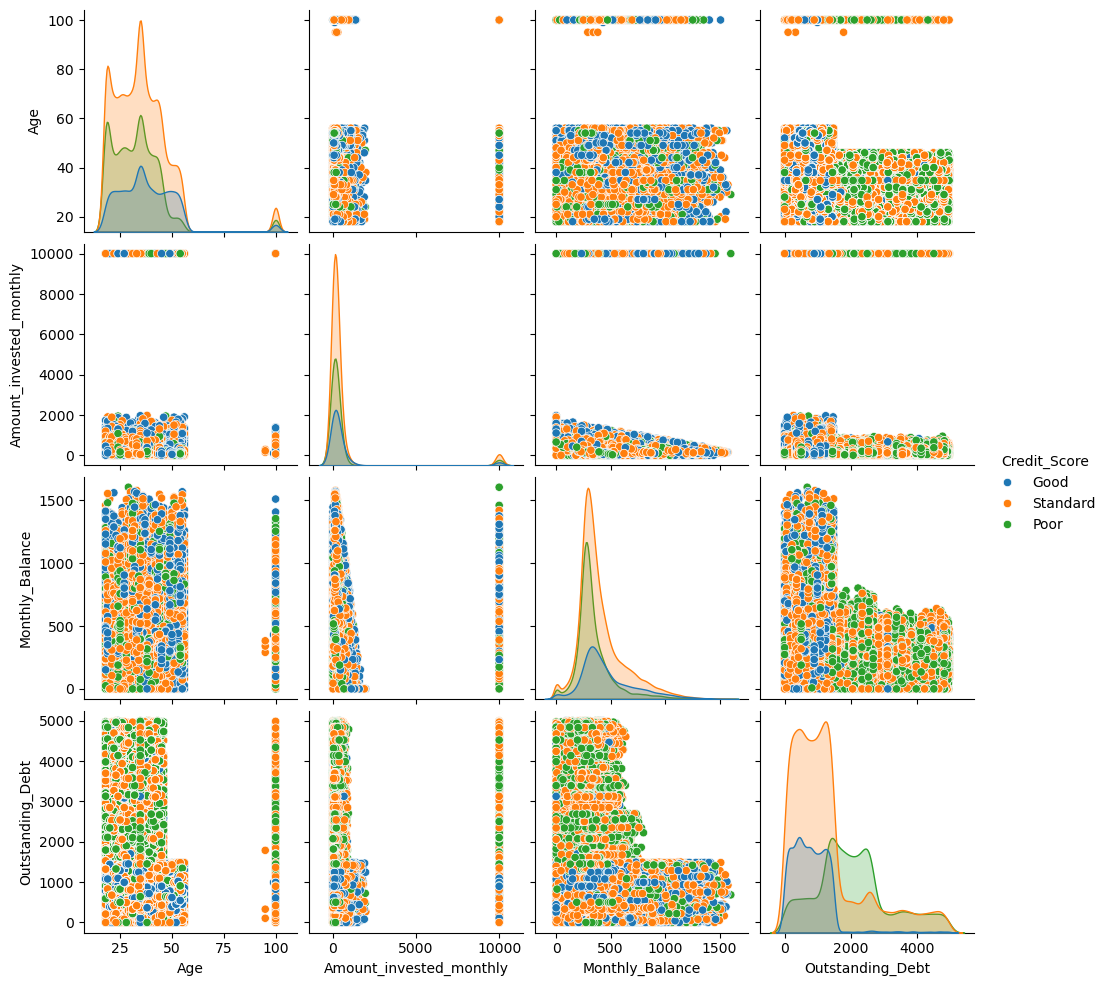

In [335]:
sns.pairplot(df_train[['Age', "Amount_invested_monthly", "Monthly_Balance", "Outstanding_Debt", 'Credit_Score']], hue="Credit_Score")

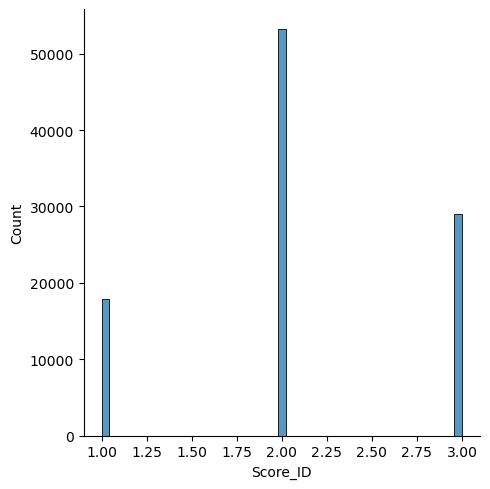

In [577]:
sns.displot(df_train.Score_ID.T);

<Axes: >

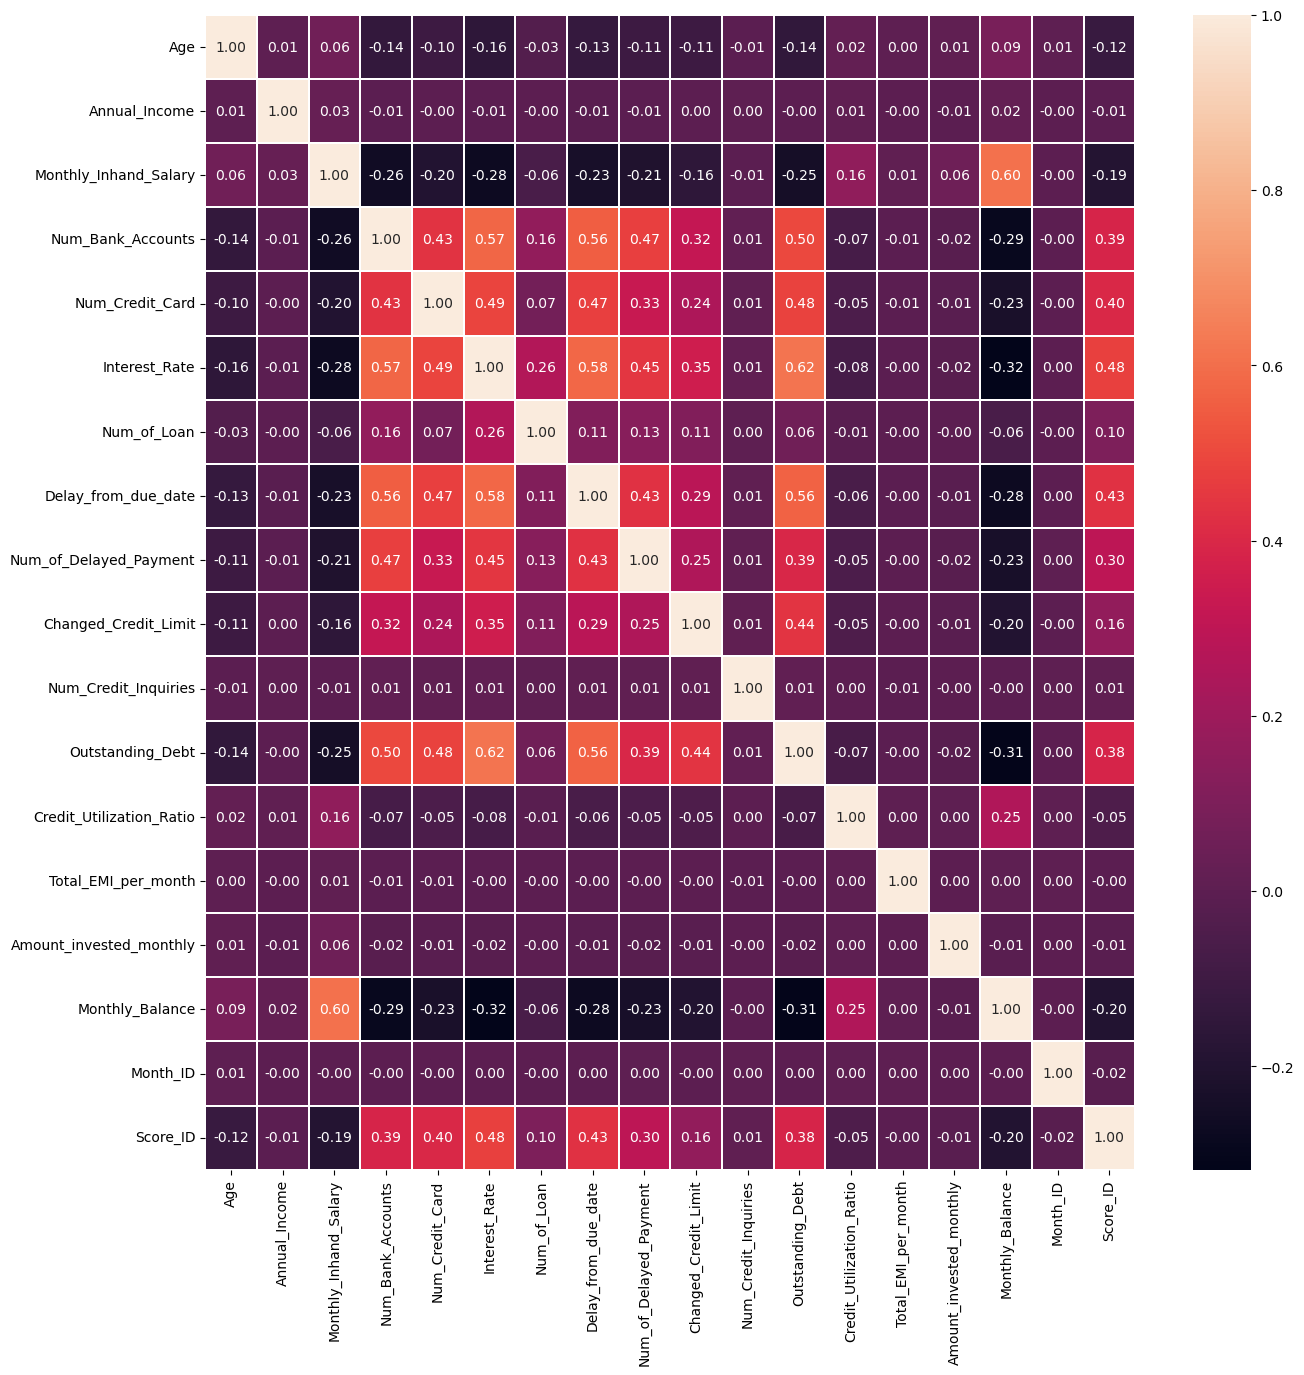

In [588]:
# Построение корреляционной матрицы
corr = df_train.drop(['Name', 'SSN', 'Occupation', 'Type_of_Loan','Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount','Payment_Behaviour'], axis=1).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, linewidths=0.1 , fmt = '.2f')

### Формирование датафрейма для обучения моделей

In [589]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Name                      90015 non-null   object 
 1   Age                       100000 non-null  float64
 2   SSN                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int32  
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [600]:
X = df_train.drop(['Name', 'SSN', 'Occupation', 'Type_of_Loan','Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount','Payment_Behaviour'], axis=1)
X.shape

(100000, 18)

In [601]:
# Ключевая перемнная
y = df_train.Score_ID
df_train.Score_ID.value_counts()

Score_ID
2    53174
3    28998
1    17828
Name: count, dtype: int64

In [864]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [865]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67000, 18) (33000, 18) (67000,) (33000,)


### KNeighborsClassifier

In [866]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [867]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 13 ms


KNeighborsClassifier()

In [868]:
knn_predict = knn.predict(X_test)

In [869]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           1       0.50      0.48      0.49      5838
           2       0.69      0.74      0.71     17471
           3       0.71      0.64      0.67      9691

    accuracy                           0.66     33000
   macro avg       0.63      0.62      0.62     33000
weighted avg       0.66      0.66      0.66     33000



<Axes: >

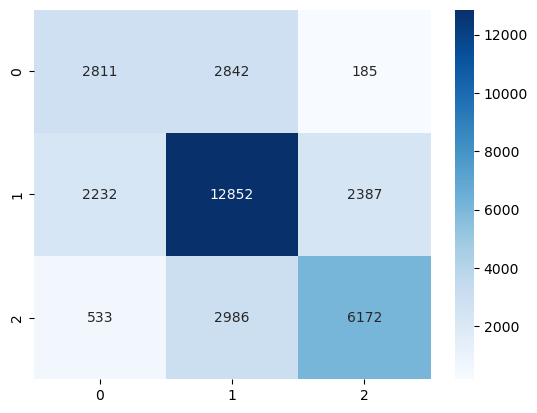

In [870]:
matrix = confusion_matrix(y_test, knn_predict)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

### Gaussian Naive Bayes

In [722]:
from sklearn.naive_bayes import GaussianNB

In [847]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [848]:
gnb_predict = GNB.predict(X_test)

In [849]:
print(classification_report(y_test, gnb_predict))

              precision    recall  f1-score   support

           1       0.32      0.26      0.29      5838
           2       0.59      0.66      0.62     17471
           3       0.59      0.53      0.56      9691

    accuracy                           0.55     33000
   macro avg       0.50      0.48      0.49     33000
weighted avg       0.54      0.55      0.55     33000



<Axes: >

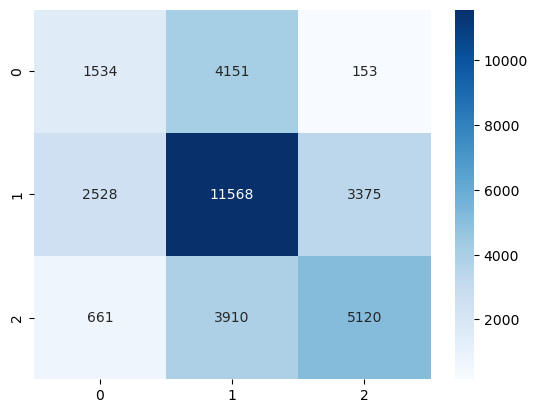

In [850]:
matrix = confusion_matrix(y_test, gnb_predict)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

### Random Forest Classifier

In [825]:
from sklearn.ensemble import RandomForestClassifier

In [853]:
%%time
rfc = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 3, random_state = 12, n_jobs = -1)
rfc.fit(X_train, y_train)

CPU times: total: 3.88 s
Wall time: 755 ms


RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=12)

In [854]:
rfc_predict = rfc.predict(X_test)

In [855]:
display(rfc_predict[:20], np.array(y_test[:20]))

array([3, 1, 2, 3, 3, 3, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2],
      dtype=int64)

array([3, 1, 2, 3, 3, 3, 2, 1, 3, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2],
      dtype=int64)

In [856]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           1       1.00      0.73      0.84      5838
           2       0.82      1.00      0.90     17471
           3       1.00      0.77      0.87      9691

    accuracy                           0.89     33000
   macro avg       0.94      0.83      0.87     33000
weighted avg       0.91      0.89      0.88     33000



<Axes: >

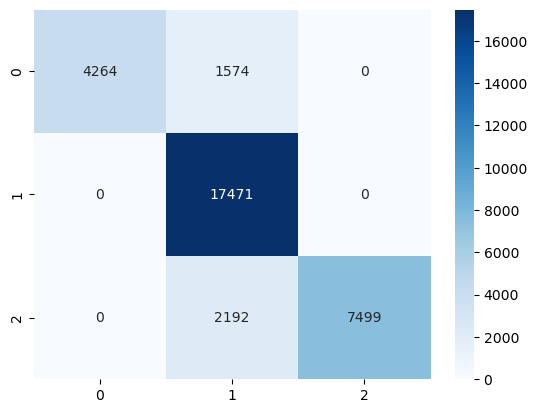

In [830]:
matrix = confusion_matrix(y_test, rfc_predict)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")

### Logistic Regression

In [859]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

CPU times: total: 31.2 ms
Wall time: 42.3 ms


In [860]:
lr = LogisticRegression(random_state=12)
lr.fit(X_train, y_train)

LogisticRegression(random_state=12)

In [861]:
lr_predict = lr.predict(X_test)
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5838
           2       1.00      1.00      1.00     17471
           3       1.00      1.00      1.00      9691

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



<Axes: >

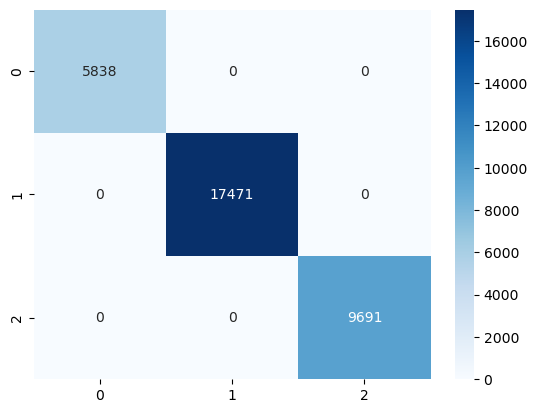

In [862]:
matrix = confusion_matrix(y_test, lr_predict)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")

### Общий вывод

1. Был установлен тренировочный датафрем.
2. Проведена обработка всех признаков тренировочного датафрейма.
3. Были обучены 4 модели на основе тренировочного датафремйа
4. Эти 4 модели были протестированы на тестовом датафрейме, который был заранее загружен.
5. Вывели статистику степени обучения моделей и результатов.